<a href="https://colab.research.google.com/github/sushily1997/Message-Spam-Detection-NLP-Text-Classification/blob/main/Spam_ham_detection_%7C_NLP_%7CText_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [4]:
#Loading data
df = pd.read_csv("/content/drive/MyDrive/spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    647  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [6]:
df['v2'] = df["v2"].map(str)

In [7]:
df['v3'] = df['v2'].apply(lambda x: len(x.split(' ')))
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13


In [8]:
df=df[['v1','v2','v3']]
df.columns=['label','text','message_len']
df.head()

,label,text,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [9]:
df.shape

(5572, 3)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


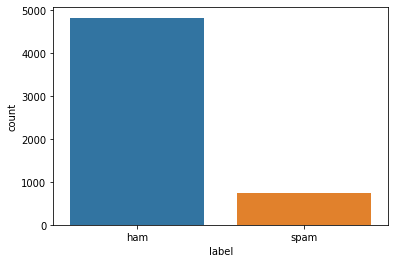

In [10]:
sn.countplot(df['label'])


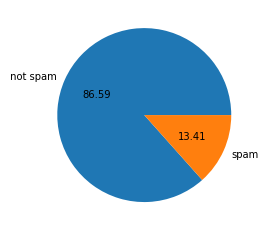

In [11]:
plt.pie(df['label'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

**The dataset contains 13.4% spam and 86.6% ham.**

In [12]:
# Percentage of data points with ham label 
print(df[df['label']=='ham'].shape[0]*100/df.shape[0])

86.59368269921033


In [13]:
ham_df = df[df['label'] == 'ham']['message_len'].value_counts().sort_index()
spam_df = df[df['label'] == 'spam']['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5572 non-null   object
 1   text         5572 non-null   object
 2   message_len  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [15]:
df.describe()

,message_len
count,5572.000000
mean,15.580761
std,11.419881
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,171.000000


In [16]:
df.isnull().sum()


label          0
text           0
message_len    0
dtype: int64

## **Distribution based on length of words**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



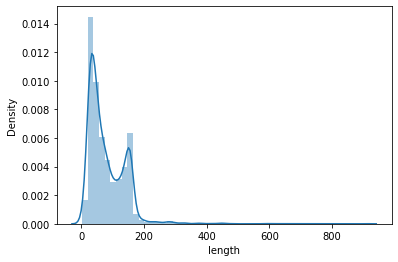

In [17]:
df['length']=df['text'].apply(lambda x: len(x))
sns.distplot(df['length'], kde=True)

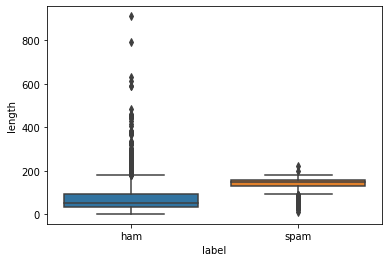

In [18]:
sns.boxplot(y='length', x='label', data=df)

In [19]:
dt=df.groupby('label').mean()
#sns.barplot(y='length', x='label', data=dt)
dt

,message_len,length
label,,
ham,14.298238,70.927047
spam,23.864793,138.390897


In [20]:
df.groupby('label').describe()

message_len                                                      length  \
            count       mean        std  min   25%   50%   75%    max   count   
label                                                                           
ham        4825.0  14.298238  11.536964  1.0   7.0  11.0  19.0  171.0  4825.0   
spam        747.0  23.864793   5.818219  2.0  22.0  25.0  28.0   35.0   747.0   

                                                                
             mean        std   min    25%    50%    75%    max  
label                                                           
ham     70.927047  58.001652   2.0   33.0   52.0   92.0  910.0  
spam   138.390897  29.041107  13.0  132.0  149.0  157.0  223.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7fbf628e0>,
      dtype=object)

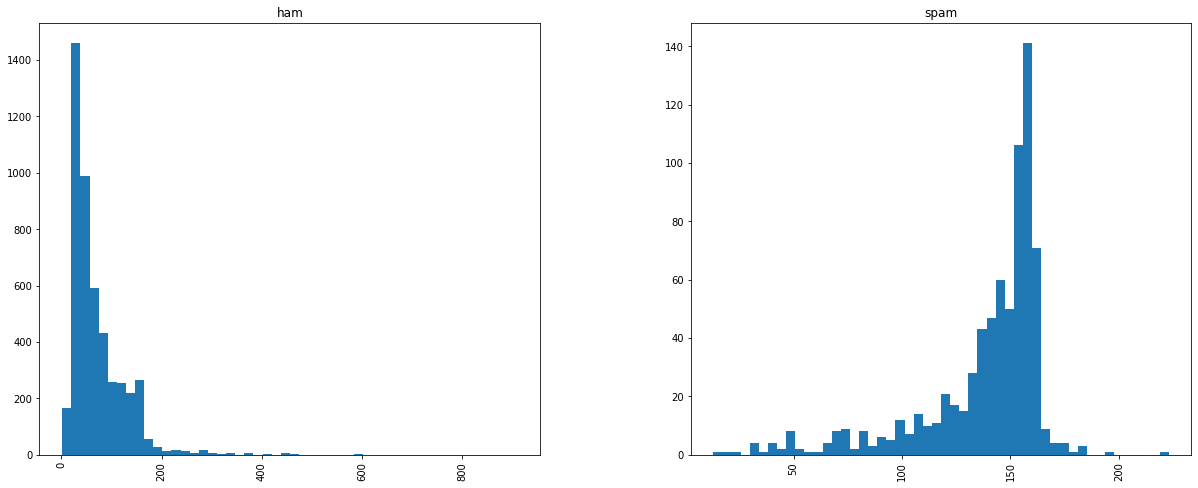

In [21]:
df.hist(column='length', by='label', bins=50,figsize=(20,8))

In [22]:
ham=df[df['label']=='ham'].copy()
spam=df[df['label']=='spam'].copy()

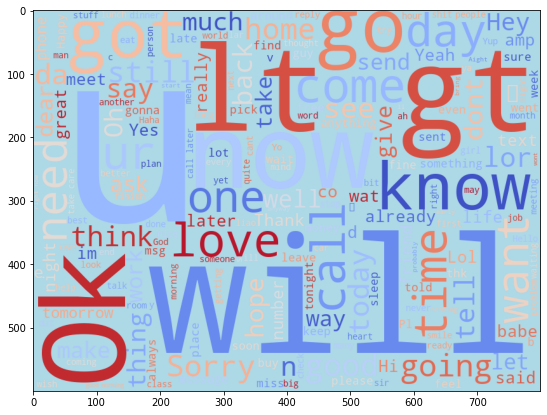

In [23]:
def show_wordcloud(df):
    text = ' '.join(df['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    diag = wordcloud.WordCloud(stopwords=stopwords,background_color='lightblue',
                    colormap='coolwarm', width=800, height=600).generate(text)
    
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(diag)  
    plt.show()

show_wordcloud(ham)

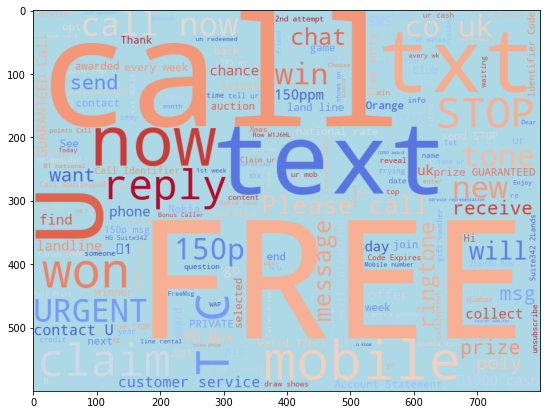

In [24]:
show_wordcloud(spam)

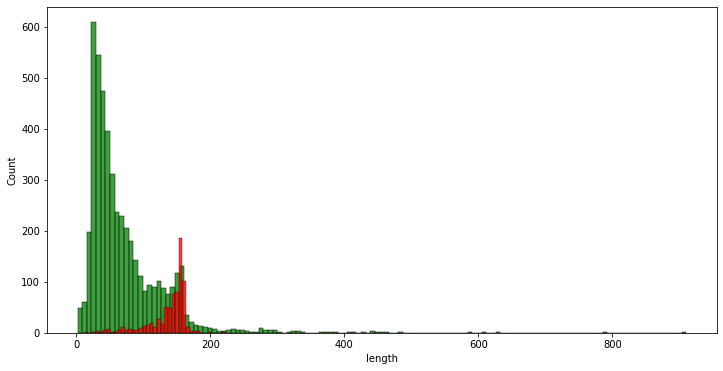

In [25]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=="ham"]['length'],color='green')
sns.histplot(df[df['label']=="spam"]['length'],color = 'red')

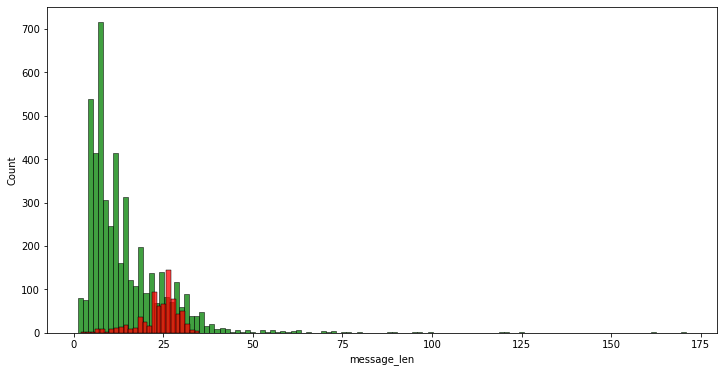

In [26]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']=="ham"]['message_len'],color='green')
sns.histplot(df[df['label']=="spam"]['message_len'],color='red')

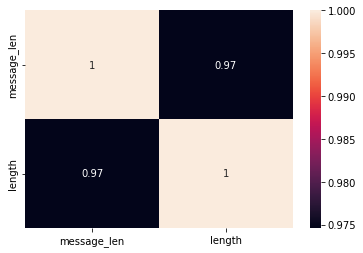

In [27]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

In [28]:
def word_count_plot(x):
    a = [i for i in x if i not in string.punctuation]
    a = "".join(a).split()
    b = [word.lower() for word in a if word.lower() not in stopwords.words("english")]  
    return b

In [29]:
ham.head()

,label,text,message_len,length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61
6,ham,Even my brother is not like to speak with me. ...,16,77


In [30]:
def word_count_plot(x):
    a = [i for i in x if i not in string.punctuation]
    a = "".join(a).split()
    b = [word.lower() for word in a if word.lower() not in stopwords.words("english")]  
    return b

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords
ham['text'] = ham['text'].apply(word_count_plot)
words_ham = ham['text'].tolist()
spam['text'] = spam['text'].apply(word_count_plot)
words_spam = spam['text'].tolist()

In [36]:
ham.head()

,label,text,message_len,length
0,ham,"[go, jurong, point, crazy, available, bugis, n...",20,111
1,ham,"[ok, lar, joking, wif, u, oni]",6,29
3,ham,"[u, dun, say, early, hor, u, c, already, say]",11,49
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",13,61
6,ham,"[even, brother, like, speak, treat, like, aids...",16,77


In [37]:
ham_words = []
for i in words_ham:
    for item in i:
        ham_words.append(item)
spam_words = []
for i in words_spam:
    for item in i:
        spam_words.append(item)

In [38]:
from collections import Counter
ham_count  = Counter(ham_words)
df_ham  = pd.DataFrame(ham_count.most_common(10),  columns=['word', 'count'])
spam_count = Counter(spam_words)
df_spam = pd.DataFrame(spam_count.most_common(10), columns=['word', 'count'])

## **Top 10 ham words**

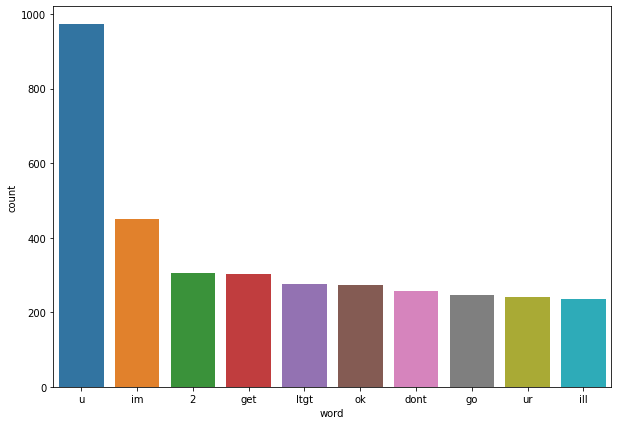

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='word', y='count', data=df_ham)

## **Top 10 spam words**

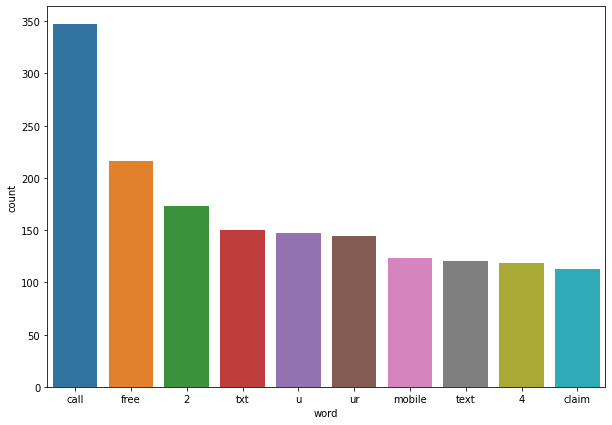

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x='word', y='count', data=df_spam)

# **Data Preprocessing**

Removing stopwords like 'where', 'why', 'how', 'all', 'any', 'both', 'each' and punctuation symbols is essential before text based predictions. These symbols have an impact on the prediction accuracy if not removed.

Stemming is the process of producing morphological variants of a root/base word. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. Porter stemmer helps us stem text data used.

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def preprocess(x):
    x = x.lower()
    x = re.sub(r'[^0-9a-zA-Z]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    l = [item for item in x if item not in string.punctuation]
    processed=[ps.stem(i) for i in l if i not in stopwords.words('english')]
    return processed

In [42]:
from sklearn.model_selection import train_test_split
X=df['text']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# **Pipeline**

Bag of words (BOW) / Bag of n-grams

By using the bag-of-words technique, we convert a text into its equivalent vector of numbers. It involves 3 sub processes:

1. Tokenization - tokenizing strings and giving an integer id for each possible token by using white-spaces and punctuation as token separators.
2. Vectorization - counting the occurrences of tokens in each document.
3. TF-IDF - normalizing and weighting with diminishing importance tokens that occur in the majority of documents.

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
def model(model_name,X_train,y_train,X_test,y_test):
    pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess)),
    ('tfidf', TfidfTransformer()),
    ('model', model_name),
    ])
    pipeline.fit(X_train,y_train)

    preds=pipeline.predict(X_test)

    print (classification_report(y_test,preds))
    print (confusion_matrix(y_test,preds))
    print('Accuracy:', pipeline.score(X_test, y_test)*100)
    print("Training Score:",pipeline.score(X_train,y_train)*100)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test,preds)
    return score

# **MultinomialNB**

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

mnb=model(MultinomialNB(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1468
        spam       0.96      0.71      0.82       204

    accuracy                           0.96      1672
   macro avg       0.96      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1462    6]
 [  59  145]]
Accuracy: 96.11244019138756
Training Score: 96.38461538461539


# RF

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf=model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1468
        spam       0.96      0.86      0.91       204

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

[[1461    7]
 [  28  176]]
Accuracy: 97.9066985645933
Training Score: 100.0


# Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb=model(GradientBoostingClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1468
        spam       0.96      0.88      0.92       204

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672

[[1461    7]
 [  25  179]]
Accuracy: 98.08612440191388
Training Score: 99.46153846153845


# XGBoost

In [54]:
from xgboost import XGBClassifier
xgb=model(XGBClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1468
        spam       0.95      0.86      0.90       204

    accuracy                           0.98      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.98      0.98      0.98      1672

[[1458   10]
 [  28  176]]
Accuracy: 97.72727272727273
Training Score: 99.07692307692308


# SVC

In [55]:
from sklearn.svm import SVC
svc=model(SVC(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1468
        spam       0.96      0.83      0.89       204

    accuracy                           0.98      1672
   macro avg       0.97      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

[[1461    7]
 [  34  170]]
Accuracy: 97.54784688995215
Training Score: 97.71794871794872


# Model Comparison

,Model,Accuracy_score
2,GBoost,0.980861
1,RF,0.979067
3,XGBoost,0.977273
4,SVC,0.975478
0,MNB,0.961124


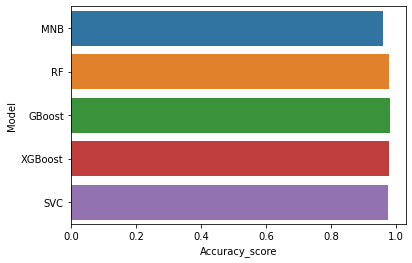

In [56]:
models = pd.DataFrame({
    'Model':['MNB','RF', 'GBoost', 'XGBoost', 'SVC'],
    'Accuracy_score' :[mnb ,rf, gb, xgb, svc]
})
sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)